In [1]:
import os
import glob
import h5py
import json
import matplotlib.pyplot as plt
import numpy as np
import datetime
import pandas as pd


# Data from 2024/12/06

In [2]:
file_path = r"000017920-MeasureRedMOT.h5"
# Open the HDF5 file to extract the relevant datasets
with h5py.File(file_path, 'r') as h5file:
    # Extracting the axis and data for plotting
    x_data = h5file['datasets/ndscan.rid_17920.points.axis_0'][:]
    y_data = h5file['datasets/ndscan.rid_17920.points.channel_red_mot_normalised_bg_corrected_img_sum_horiz'][:]

In [3]:
# copy paste this code to the beginning of your script to set the plotting style for a one column figure

from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "figure.constrained_layout.use": True
})

plt.rcParams["savefig.bbox"] = None
plt.rcParams["figure.figsize"] = (5.9,3)  # (width, height) in inches, change height but not width
plt.rcParams["figure.titlesize"] = 10 # this is only for plt.suptitle, i set it to be the same as the rest

plt.rcParams["axes.titlesize"] = 10 # control title size
plt.rcParams["axes.labelsize"] = 10 # control x and y axis labels
plt.rcParams["axes.labelpad"] = 4.0 # distance between axis label and axis numbers
plt.rcParams["xtick.labelsize"] = 10 # independent control of xlabel fontsize
plt.rcParams["ytick.labelsize"] = 10 # independent control of ylabel fontsize

plt.rcParams["legend.fontsize"] = 7.5 # control legend size, I set it to be slightly smaller than title/axes label
# plt.rcParams["legend.facecolor"] = (0.9, 0.9, 0.9) # legend background color
# plt.rcParams["legend.edgecolor"] = (0, 0, 0) # legend border line color
# plt.rcParams["legend.frameon"] = True # whether or not to draw a border around legend
# plt.rcParams["legend.framealpha"] = 0.1 # legend background transparency
plt.rcParams["legend.loc"] = "best" # default legend location
plt.rcParams["legend.handletextpad"] = 0.8  # Horizontal space between legend point and text (default 0.8)
plt.rcParams["legend.labelspacing"] = 0.6  # Vertical space between legend entries (default 0.5)
# plt.rcParams["legend.columnspacing"] = 2.0  # Space between columns in multi-column legends
# plt.rcParams["legend.borderpad"] = 1.0  # Space between legend content and the box
# plt.rcParams["legend.handlelength"] = 2.0  # Length of legend marker lines

plt.rcParams["lines.linewidth"] = 1
plt.rcParams["lines.markersize"] = 6 #data point size

# CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"
plt.rcParams["lines.linewidth"] = 1
plt.rcParams["lines.markersize"] = 6 #data point size
plt.rcParams["lines.markeredgewidth"] = 1.5 # width of the edge of the marker
plt.rcParams["lines.markeredgecolor"] = "black" # color of the edge of the marker
plt.rcParams["lines.markerfacecolor"] = "crimson" # color of the inside of the marker
plt.rcParams["lines.marker"] = "o" # marker type, see https://matplotlib.org/stable/api/markers_api.html for all options
plt.rcParams["lines.color"] = "black" # color of the line
# # CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"


plt.rcParams["grid.linestyle"] = "--"
plt.rcParams['axes.grid'] = True
# plt.rcParams["grid.linewidth"] = 0.7

# plt.rcParams["xtick.major.pad"] = 4.0 # distance between xticks dashes and xaxis numbers
# plt.rcParams["xtick.major.size"] = 3.0
# plt.rcParams["xtick.major.width"] = 0.7
# plt.rcParams["ytick.major.pad"] = 4.0 # distance between yticks dashes and yaxis numbers
# plt.rcParams["ytick.major.size"] = 3.0
# plt.rcParams["ytick.major.width"] = 0.7

In [4]:
freq = x_data
transferefficiency = y_data

freq = np.array(freq)/1e6
transferefficiency = np.array(transferefficiency)/10

# Sort freq and rearrange transferefficiency accordingly
sorted_indices = np.argsort(freq)
freq = freq[sorted_indices]
transferefficiency = transferefficiency[sorted_indices]

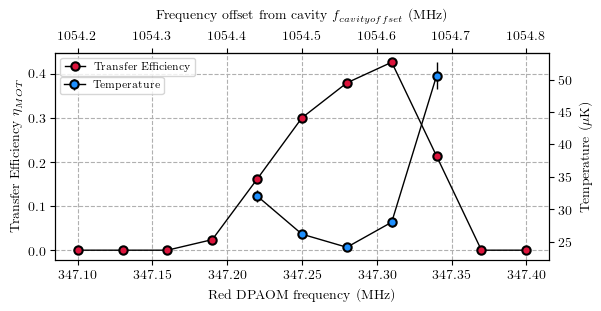

In [7]:
from matplotlib.ticker import ScalarFormatter

fig, ax = plt.subplots()

ax.plot(freq, transferefficiency, 'ko-', label='Transfer Efficiency')
ax.set_xlabel('Red DPAOM frequency (MHz)')
ax.set_ylabel(r'Transfer Efficiency $\eta_{MOT}$')
# Define the transformation functions for the secondary x-axis
def freq_to_offset(x):
    return x * 2 + 460 - 100 
def offset_to_freq(x):
    return (x + 100 - 460) / 2
# Apply the transformation functions for the secondary axis
ax_top = ax.secondary_xaxis('top', functions=(freq_to_offset, offset_to_freq))
ax_top.set_xlabel(r'Frequency offset from cavity $f_{cavityoffset}$ (MHz)', labelpad=8)

# Disable scientific notation
formatter = ScalarFormatter(useMathText=False)
formatter.set_scientific(False)
formatter.set_useOffset(False)
ax_top.xaxis.set_major_formatter(formatter)

# ax.set_xticks(np.arange(347.2, 347.4, 0.05))
# ax_top.set_xticks(freq_to_offset(np.arange(347.2, 347.4, 0.05)))

ax2 = ax.twinx()
temp_x = [347.22, 347.25, 347.28, 347.31, 347.34]
temp_y = [32.05, 26.16, 24.14, 28.01, 50.59]
temp_y_err = [0.93, 0.29, 0.45, 0.76, 2.09]
ax2.errorbar(temp_x, temp_y, yerr=temp_y_err, markerfacecolor='dodgerblue', color='black', label='Temperature')  # Large dots and connected points
ax2.grid(False)
ax2.set_ylabel(r'Temperature ($\mu$K)')
ax2.legend(bbox_to_anchor=(0.230, 0.91))
# ax2.set_ylim(20, 60)

ax.legend(loc='upper left')


plt.savefig("250503 NbRedMOTSpectroscopyTemperature.pdf")